In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')

In [3]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [4]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
DF['World without China'] = DF.World - DF.China
#DF.index.rename('Date', inplace = True)

In [5]:
Countries = ['India', 'World', 'World without China',
                      'US', 'Germany', 'Italy', 'Spain', 'China',
                      'UK', 'France', 'Brazil',
                      'S.Korea', 'Iran', 'Belgium', 
                       'Russia', 'Mexico', 'Canada']#[::-1]
Other_Countries = ['Belgium', 'Brazil', 'Canada', 'China', 'Ecuador', 'France', 'Germany',
       'India', 'Iran', 'Ireland', 'Italy', 'Mexico', 'Netherlands', 'Peru',
       'Portugal', 'Russia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'US',
       'UK', 'World', 'S.Korea']
colors = {'India': 'Blue', 'World': 'Blue', 'World without China': 'Green', 'US': 'Black', 'China': 'red', 
          'Spain': 'yellow','Italy': 'grey', 'Iran': 'brown', 'Ireland': 'violet', 'UK': 'Purple', 
          'S.Korea': 'Black', 'France': 'orange', 'Germany': 'lime', 'Australia': 'Teal',
          'Russia': 'Brown', 'Mexico': 'Orange', 'Canada': 'Teal', 'Brazil': 'darkgreen', 'Belgium': 'cyan'}

In [6]:
def plotter(DF, name, scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = '-.' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [7]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = '-.' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [8]:
Deaths = DF

In [9]:
Deaths[Countries].tail(14)

Country/Region,India,World,World without China,US,Germany,Italy,Spain,China,UK,France,Brazil,S.Korea,Iran,Belgium,Russia,Mexico,Canada
2020-05-09,2101,279311,274674,78795,7549,30395,26478,4637,31662,26313,10656,256,6589,8581,1827,3353,4823
2020-05-10,2212,282709,278072,79526,7569,30560,26621,4637,31930,26383,11123,256,6640,8656,1915,3465,4991
2020-05-11,2294,286330,281693,80682,7661,30739,26744,4637,32141,26646,11653,258,6685,8707,2009,3573,5115
2020-05-12,2415,291942,287305,82356,7738,30911,26920,4637,32769,26994,12461,259,6733,8761,2116,3926,5300
2020-05-13,2551,297197,292560,84119,7861,31106,27104,4637,33264,27077,13240,260,6783,8843,2212,4220,5425
2020-05-14,2649,302418,297781,85898,7884,31368,27321,4637,33693,27428,13999,260,6854,8903,2305,4477,5592
2020-05-15,2753,307666,303029,87530,7897,31610,27459,4637,34078,27532,14962,262,6902,8959,2418,4767,5679
2020-05-16,2871,311781,307143,88754,7938,31763,27563,4638,34546,27532,15662,262,6937,9005,2537,5045,5800
2020-05-17,3025,315185,310547,89562,7962,31908,27563,4638,34716,28111,16118,263,6988,9052,2631,5177,5903
2020-05-18,3156,318481,313843,90347,8003,32007,27709,4638,34876,28242,16853,263,7057,9080,2722,5332,5960


c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


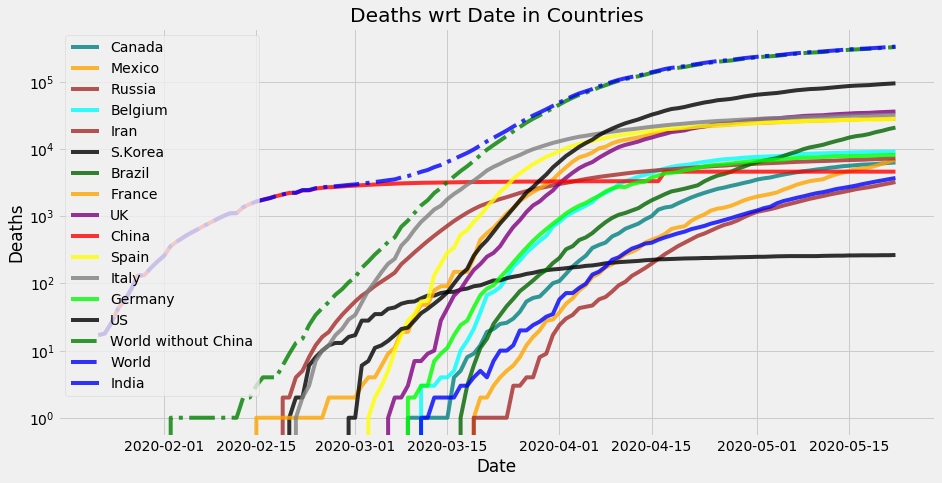

In [10]:
plotter(Deaths, 'Deaths')
Deaths.transpose().to_csv('CSVs/Deaths.csv')

In [11]:
Biweekly_Deaths = np.round((Deaths - Deaths.shift(14))/14, 2)
Biweekly_Deaths = Biweekly_Deaths.fillna(0)#.astype('int')
Biweekly_Deaths[Countries].tail(14)

Country/Region,India,World,World without China,US,Germany,Italy,Spain,China,UK,France,Brazil,S.Korea,Iran,Belgium,Russia,Mexico,Canada
2020-05-09,91.14,5223.14,5223.07,1788.57,119.43,286.50,255.43,0.07,568.93,264.00,471.36,1.00,67.07,118.86,81.86,146.29,160.86
2020-05-10,95.07,5200.64,5200.64,1760.36,113.79,279.71,245.07,0.00,558.07,251.71,488.36,0.93,66.43,111.57,83.43,151.00,164.57
2020-05-11,96.79,5134.71,5134.71,1747.36,109.64,268.71,230.21,0.00,548.79,239.29,503.57,1.00,62.79,107.14,86.79,152.79,162.43
2020-05-12,100.50,5081.50,5081.50,1714.36,101.71,253.71,221.29,0.00,528.57,237.93,527.00,0.93,61.14,102.14,89.21,168.36,165.50
2020-05-13,105.14,4966.57,4966.57,1653.71,99.57,244.57,202.07,0.00,507.00,213.36,551.93,0.93,59.00,95.86,88.57,177.71,162.14
2020-05-14,106.79,4932.71,4932.71,1635.86,90.07,242.93,198.43,0.00,489.36,217.79,570.93,0.86,59.00,93.50,88.00,187.00,163.00
2020-05-15,109.29,4931.93,4931.93,1613.36,82.93,241.00,208.29,0.00,463.93,209.64,610.71,0.86,57.93,89.71,89.21,199.64,153.00
2020-05-16,110.57,4854.86,4854.79,1598.93,80.43,218.07,175.93,0.07,452.93,197.79,635.79,0.86,55.79,88.57,93.93,213.14,151.14
2020-05-17,116.71,4836.79,4836.71,1562.86,78.29,216.00,164.21,0.07,442.57,229.36,647.64,0.79,56.07,86.29,96.50,215.93,150.57
2020-05-18,113.57,4781.71,4781.64,1530.36,72.14,209.14,162.93,0.07,433.36,217.00,677.57,0.64,55.71,82.57,97.57,218.64,139.79


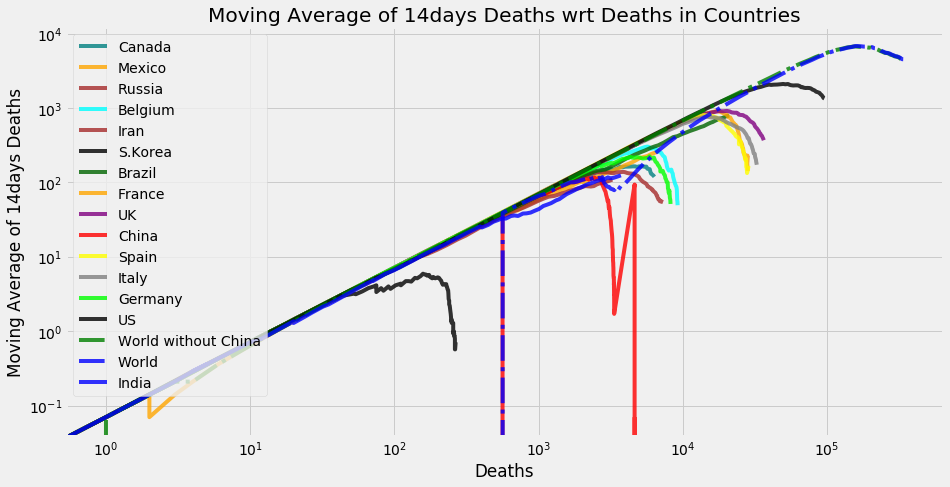

In [12]:
plotwrtDeaths(Biweekly_Deaths, 'Moving Average of 14days Deaths', Deaths)
Biweekly_Deaths.transpose().to_csv('CSVs/Biweekly_Deaths.csv')

In [13]:
Weekly_Deaths = np.round((Deaths - Deaths.shift(7))/7)
Weekly_Deaths = Weekly_Deaths.fillna(0).astype('int')
Weekly_Deaths[Countries].tail(14)

Country/Region,India,World,World without China,US,Germany,Italy,Spain,China,UK,France,Brazil,S.Korea,Iran,Belgium,Russia,Mexico,Canada
2020-05-09,111,5071,5071,1775,105,241,197,0,494,221,556,1,62,117,86,185,163
2020-05-10,117,5034,5034,1692,100,239,194,0,487,212,582,1,62,116,91,187,171
2020-05-11,104,4970,4970,1680,95,237,188,0,476,206,612,1,58,112,93,186,159
2020-05-12,103,4958,4958,1613,106,228,187,0,467,208,646,1,56,106,95,203,159
2020-05-13,109,4763,4763,1523,84,203,178,0,445,181,665,1,52,72,96,217,151
2020-05-14,109,4693,4693,1462,70,201,179,0,429,205,687,1,53,70,97,217,150
2020-05-15,110,4681,4681,1479,55,201,166,0,395,186,706,1,52,63,99,230,140
2020-05-16,110,4639,4638,1423,56,195,155,0,412,174,715,1,50,61,101,242,140
2020-05-17,116,4639,4639,1434,56,193,135,0,398,247,714,1,50,57,102,245,130
2020-05-18,123,4593,4593,1381,49,181,138,0,391,228,743,1,53,53,102,251,121


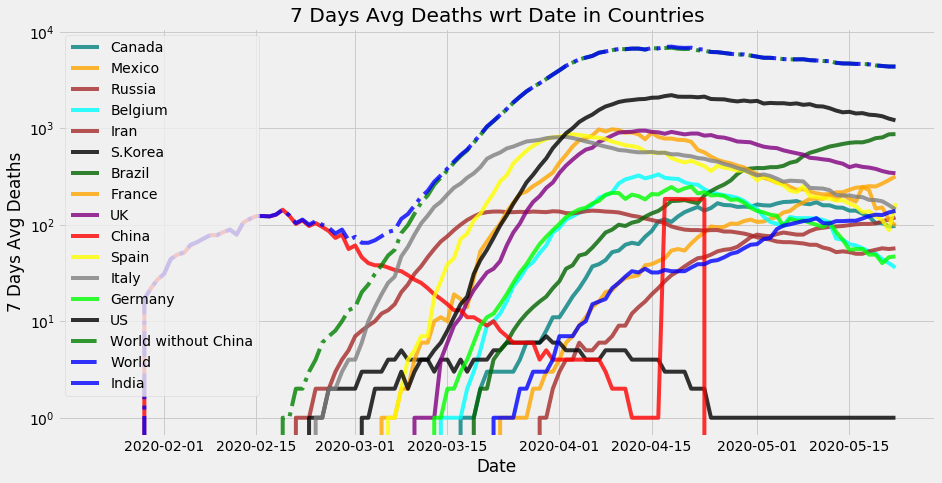

In [14]:
plotter(Weekly_Deaths, '7 Days Avg Deaths')

In [15]:
ThreeDaysDeaths = np.round((Deaths - Deaths.shift(3))/3)
ThreeDaysDeaths = ThreeDaysDeaths.fillna(0).astype('int')
ThreeDaysDeaths[Countries].tail(14)

Country/Region,India,World,World without China,US,Germany,Italy,Spain,China,UK,France,Brazil,S.Korea,Iran,Belgium,Russia,Mexico,Canada
2020-05-09,105,5152,5152,1780,91,237,207,0,504,167,689,0,57,81,97,216,152
2020-05-10,108,4381,4381,1288,59,201,184,0,414,131,644,0,51,80,97,168,150
2020-05-11,103,3811,3811,1167,50,179,148,0,275,138,545,1,48,62,95,138,139
2020-05-12,105,4210,4210,1187,63,172,147,0,369,227,602,1,48,60,96,191,159
2020-05-13,113,4829,4829,1531,97,182,161,0,445,231,706,1,48,62,99,252,145
2020-05-14,118,5363,5363,1739,74,210,192,0,517,261,782,1,56,65,99,301,159
2020-05-15,113,5241,5241,1725,53,233,180,0,436,179,834,1,56,66,101,280,126
2020-05-16,107,4861,4861,1545,26,219,153,0,427,152,807,1,51,54,108,275,125
2020-05-17,125,4256,4255,1221,26,180,81,0,341,228,706,1,45,50,109,233,104
2020-05-18,134,3605,3605,939,35,132,83,0,266,237,630,0,52,40,101,188,94


In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(14)

Country/Region,India,World,World without China,US,Germany,Italy,Spain,China,UK,France,Brazil,S.Korea,Iran,Belgium,Russia,Mexico,Canada
2020-05-09,116,4413,4413,1615,39,194,179,0,346,80,639,0,48,60,104,193,126
2020-05-10,111,3398,3398,731,20,165,143,0,268,70,467,0,51,75,88,112,168
2020-05-11,82,3621,3621,1156,92,179,123,0,211,263,530,2,45,51,94,108,124
2020-05-12,121,5612,5612,1674,77,172,176,0,628,348,808,1,48,54,107,353,185
2020-05-13,136,5255,5255,1763,123,195,184,0,495,83,779,1,50,82,96,294,125
2020-05-14,98,5221,5221,1779,23,262,217,0,429,351,759,0,71,60,93,257,167
2020-05-15,104,5248,5248,1632,13,242,138,0,385,104,963,2,48,56,113,290,87
2020-05-16,118,4115,4114,1224,41,153,104,1,468,0,700,0,35,46,119,278,121
2020-05-17,154,3404,3404,808,24,145,0,0,170,579,456,1,51,47,94,132,103
2020-05-18,131,3296,3296,785,41,99,146,0,160,131,735,0,69,28,91,155,57


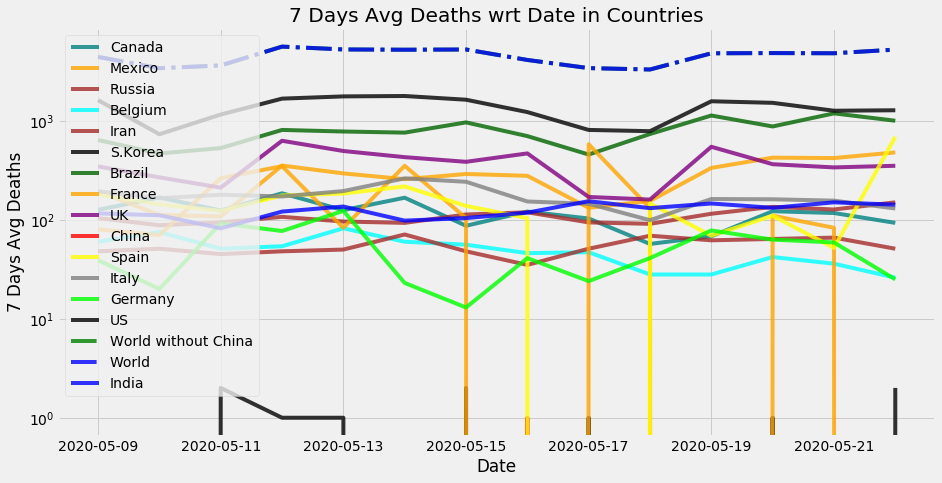

In [17]:
plotter(Daily_Deaths.tail(14), '7 Days Avg Deaths', scale = 'log')
Daily_Deaths.transpose().to_csv('CSVs/Daily_Deaths.csv')

In [18]:
Reproductivity = np.round(Weekly_Deaths/Biweekly_Deaths.shift(10), 4)#.iloc[-1]
Reproductivity[Countries].iloc[-1]

Country/Region
India                  1.3831
World                  0.8572
World without China    0.8572
US                     0.7041
Germany                0.4621
Italy                  0.5676
Spain                  0.7547
China                     NaN
UK                     0.6470
France                 0.4119
Brazil                 1.6490
S.Korea                1.0753
Iran                   0.9323
Belgium                0.3525
Russia                 1.3339
Mexico                 1.8829
Canada                 0.5861
Name: 2020-05-22 00:00:00, dtype: float64

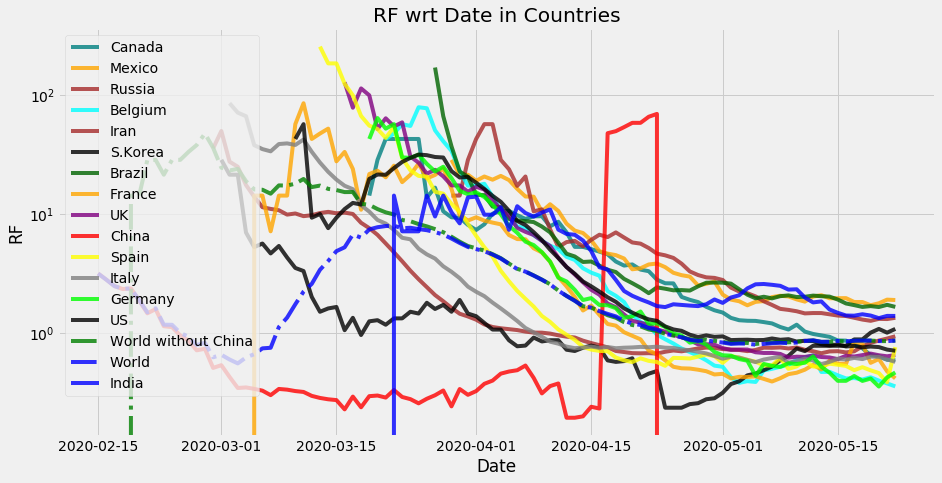

In [19]:
plotter(Reproductivity, 'RF')
Reproductivity.transpose().to_csv('CSVs/Reproductivity.csv')

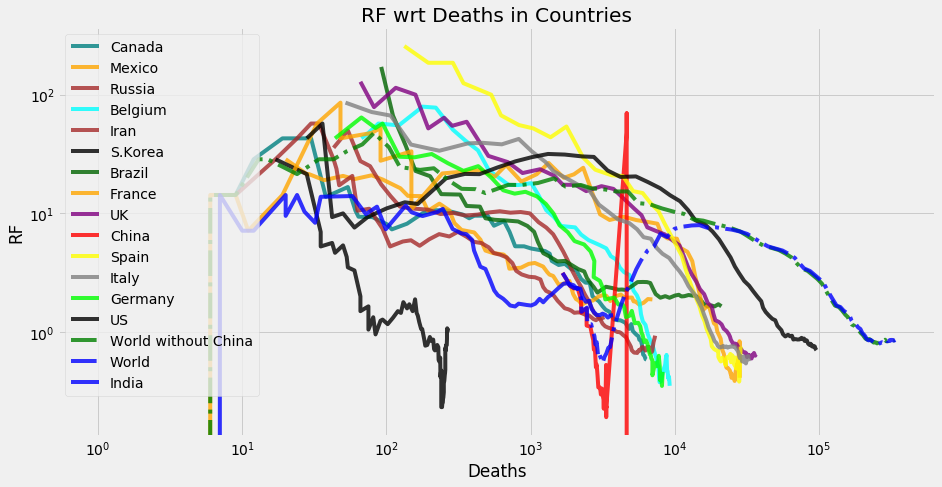

In [20]:
plotwrtDeaths(Reproductivity, 'RF', Deaths)

In [21]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

In [22]:
D = {
    'Deaths':Deaths,
    'Biweekly Deaths':Biweekly_Deaths,
    'Weekly Deaths': Weekly_Deaths,
    'Triday Deaths': ThreeDaysDeaths,
    'Daily Deaths':Daily_Deaths,
    'Reproductive Factor':Reproductivity,
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
All_lastday = LastDay_DF
LastDay_DF = LastDay_DF[LastDay_DF.Deaths>=1500]

In [23]:
LastDay_DF.sort_values('Deaths', ascending = False)#.head(20)

,Deaths,Biweekly Deaths,Weekly Deaths,Triday Deaths,Daily Deaths,Reproductive Factor
Country,,,,,,
World,338160,4518.71,4356,4958,5236,0.8572
World without China,333522,4518.64,4356,4958,5236,0.8572
US,95979,1342.79,1207,1353,1277,0.7041
UK,36475,368.50,342,351,351,0.6470
Italy,32616,172.50,144,149,130,0.5676
Spain,28628,166.36,167,283,688,0.7547
France,28218,141.79,98,64,0,0.4119
Brazil,21048,787.93,869,1022,1001,1.6490
Belgium,9212,49.36,36,35,26,0.3525


In [24]:
Growth = np.round(Weekly_Deaths/Deaths, 4)
#Growth = Growth.fillna(0)
Growth[Countries].tail(14)

Country/Region,India,World,World without China,US,Germany,Italy,Spain,China,UK,France,Brazil,S.Korea,Iran,Belgium,Russia,Mexico,Canada
2020-05-09,0.0528,0.0182,0.0185,0.0225,0.0139,0.0079,0.0074,0.0,0.0156,0.0084,0.0522,0.0039,0.0094,0.0136,0.0471,0.0552,0.0338
2020-05-10,0.0529,0.0178,0.0181,0.0213,0.0132,0.0078,0.0073,0.0,0.0153,0.0080,0.0523,0.0039,0.0093,0.0134,0.0475,0.0540,0.0343
2020-05-11,0.0453,0.0174,0.0176,0.0208,0.0124,0.0077,0.0070,0.0,0.0148,0.0077,0.0525,0.0039,0.0087,0.0129,0.0463,0.0521,0.0311
2020-05-12,0.0427,0.0170,0.0173,0.0196,0.0137,0.0074,0.0069,0.0,0.0143,0.0077,0.0518,0.0039,0.0083,0.0121,0.0449,0.0517,0.0300
2020-05-13,0.0427,0.0160,0.0163,0.0181,0.0107,0.0065,0.0066,0.0,0.0134,0.0067,0.0502,0.0038,0.0077,0.0081,0.0434,0.0514,0.0278
2020-05-14,0.0411,0.0155,0.0158,0.0170,0.0089,0.0064,0.0066,0.0,0.0127,0.0075,0.0491,0.0038,0.0077,0.0079,0.0421,0.0485,0.0268
2020-05-15,0.0400,0.0152,0.0154,0.0169,0.0070,0.0064,0.0060,0.0,0.0116,0.0068,0.0472,0.0038,0.0075,0.0070,0.0409,0.0482,0.0247
2020-05-16,0.0383,0.0149,0.0151,0.0160,0.0071,0.0061,0.0056,0.0,0.0119,0.0063,0.0457,0.0038,0.0072,0.0068,0.0398,0.0480,0.0241
2020-05-17,0.0383,0.0147,0.0149,0.0160,0.0070,0.0060,0.0049,0.0,0.0115,0.0088,0.0443,0.0038,0.0072,0.0063,0.0388,0.0473,0.0220
2020-05-18,0.0390,0.0144,0.0146,0.0153,0.0061,0.0057,0.0050,0.0,0.0112,0.0081,0.0441,0.0038,0.0075,0.0058,0.0375,0.0471,0.0203


In [25]:
def days100(DF):
    X = pd.DataFrame(list(DF['World']))
    for col in Countries:
        df = pd.Series(list(DF[Deaths[col]>10][col]))
        #df = DF[col]>100
        X[col] = df
    X = X[Countries]
    X = X[[c for c in Countries if c not in ['World', 'China']]]
    return X

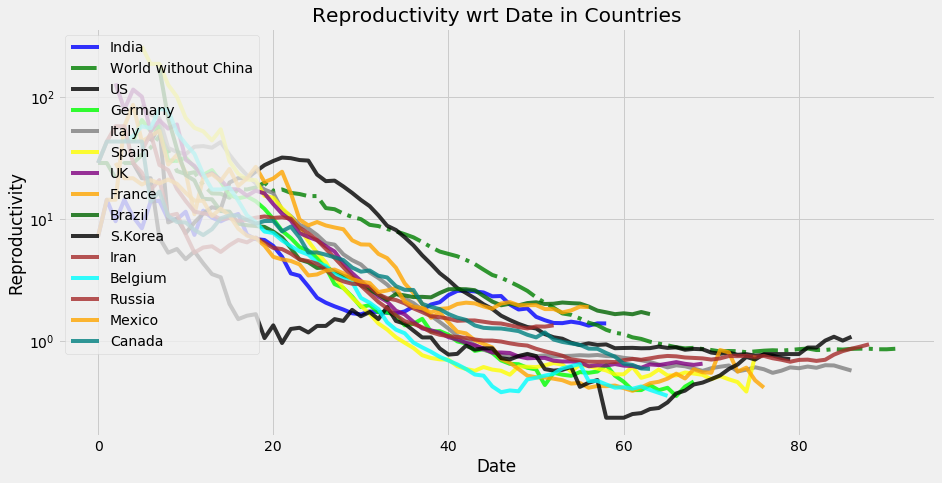

In [26]:
RF = days100(Reproductivity)
plotter(RF, 'Reproductivity', col = 'all')
RF.transpose().to_csv('CSVs/RF50.csv')

In [27]:
LastDay_DF.index

Index(['Belgium', 'Brazil', 'Canada', 'China', 'Ecuador', 'France', 'Germany',
       'India', 'Iran', 'Ireland', 'Italy', 'Mexico', 'Netherlands', 'Peru',
       'Russia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'US', 'UK',
       'World', 'World without China'],
      dtype='object', name='Country')

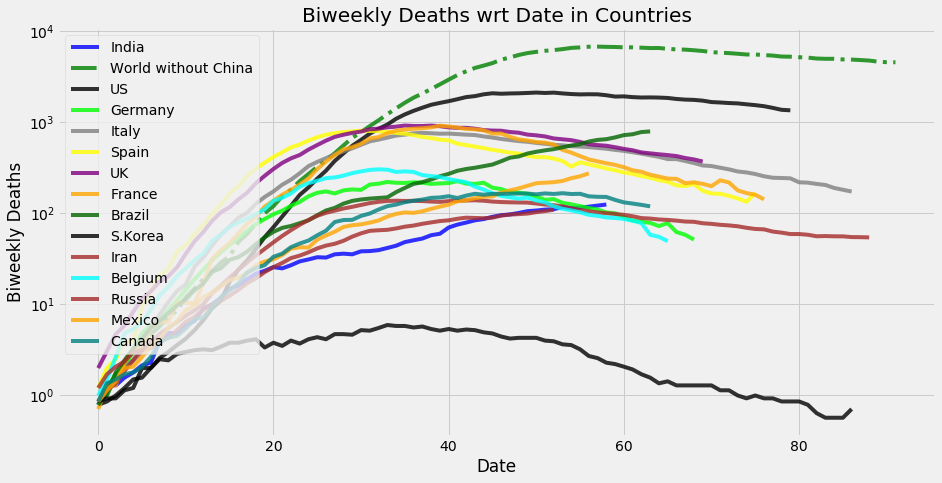

In [28]:
BD = days100(Biweekly_Deaths)
plotter(BD, 'Biweekly Deaths', col = 'all')
BD.transpose().to_csv('CSVs/BiweeklyDeaths50.csv')

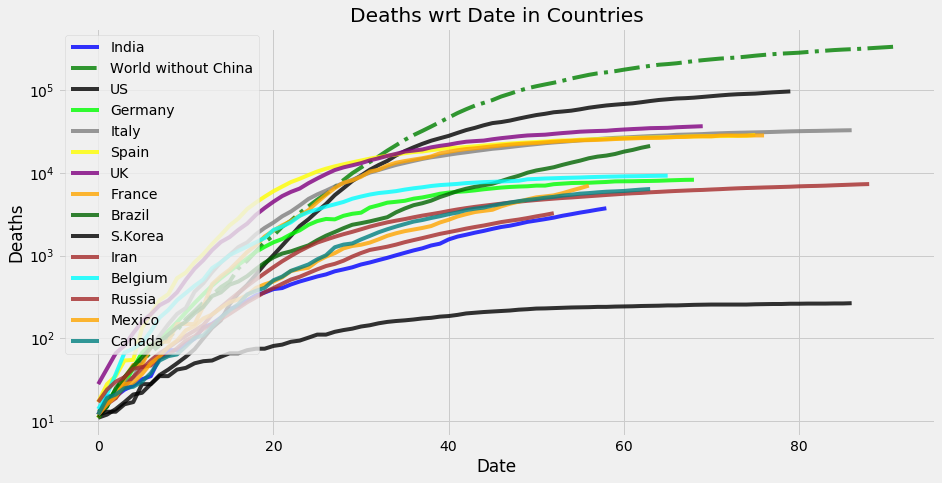

In [29]:
D = days100(Deaths)
plotter(D, 'Deaths', col = 'all')
D.transpose().to_csv('CSVs/Deaths50.csv')

In [30]:
Dates = pd.DataFrame(list(Deaths.World))
Dates.index = Deaths.index
for col in Deaths.columns:
    Dates[col] = Deaths.index
    pd.to_datetime(Dates[col])
Dates = days100(Dates)
Dates.transpose().to_csv('CSVs/Dates50.csv')